In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#replacing values with 0 to nan (some columns cotains 0 values which are invalid)
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [8]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

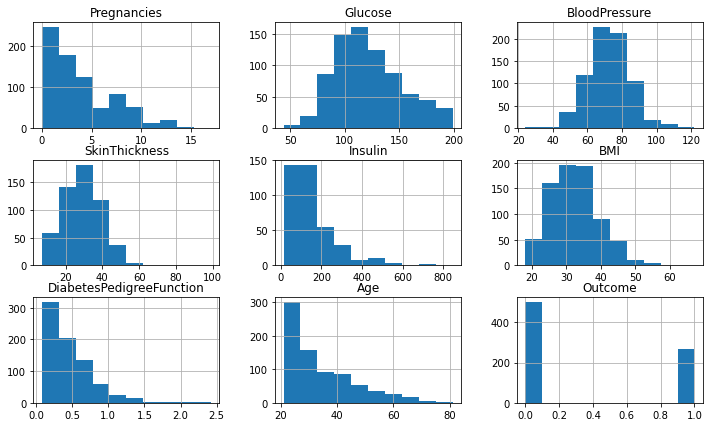

In [9]:

p=df.hist(figsize=(12,7))

In [10]:
df["Glucose"]=df["Glucose"].fillna(df["Glucose"].mean())

In [11]:
df["BloodPressure"]=df["BloodPressure"].fillna(df["BloodPressure"].mean())

In [12]:
df["SkinThickness"]=df["SkinThickness"].fillna(df["SkinThickness"].median())
#slightly skewed median is greater so median

In [13]:
df["Insulin"]=df["Insulin"].fillna(df["Insulin"].median())

In [14]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

In [15]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

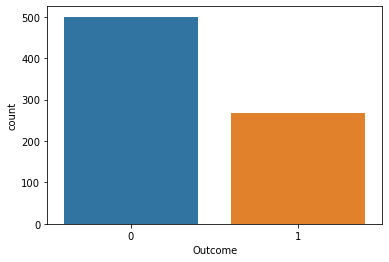

In [16]:
sns.countplot(df["Outcome"])
#imbalance data

In [17]:
# bivariate analysis

<AxesSubplot:>

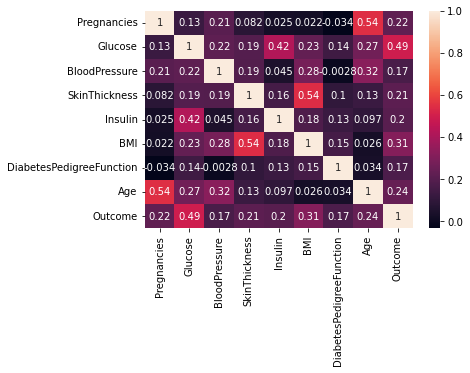

In [18]:
sns.heatmap(data=df.corr(),annot=True)

In [19]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [20]:
#train test split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [22]:
X_train.shape

(614, 8)

In [23]:
X_test.shape

(154, 8)

In [24]:
y_train.shape

(614,)

In [25]:
y_test.shape

(154,)

In [26]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# model building

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [44]:
clasifier=KNeighborsClassifier(n_neighbors=11)
clasifier.fit(X_train,y_train)
y_train_pred=clasifier.predict(X_train)
y_test_pred=clasifier.predict(X_test)
print("Train data")
print("Acccuracy score:{}".format(accuracy_score(y_train,y_train_pred)))
print("Test data")
print("Acccuracy score:{}".format(accuracy_score(y_test,y_test_pred)))

   

Train data
Acccuracy score:0.8013029315960912
Test data
Acccuracy score:0.7987012987012987


# hyper parameter tuning


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid={
    "n_neighbors":np.arange(1,15),
    "weights":["uniform","distance"],
    "metric":["minkowski","manhatten","euclidean"]
}

In [39]:
grid_clasifier=GridSearchCV(clasifier,param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_clasifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhatten', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
grid_clasifier.best_params_

{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'distance'}

In [42]:
grid_clasifier.best_score_

0.7622284419565506

In [46]:
grid_train_pred=grid_clasifier.predict(X_train)
grid_test_pred=grid_clasifier.predict(X_test)
print("Train data")
print("Acccuracy score:{}".format(accuracy_score(y_train,grid_train_pred)))
print("Test data")
print("Acccuracy score:{}".format(accuracy_score(y_test,grid_test_pred)))
#  *o v e r f i t*   SO   k=11   i s   b e s t

Train data
Acccuracy score:1.0
Test data
Acccuracy score:0.8246753246753247
